In [7]:
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("creditcard.csv")
data2=pd.read_csv("data_train_before_smote1.csv")
data_test=pd.read_csv("test_data_set1.csv")

In [8]:
data_test["Class"].value_counts()

0    85309
1      134
Name: Class, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
input_var2 = list(set(data2.columns)- set(["Class"]))
X2 = data2[input_var2]
Y2 = data2["Class"]

In [9]:
input_var3 = list(set(data_test.columns)- set(["Class"]))
X_test = data_test[input_var3]
Y_test = data_test["Class"]

In [4]:
Y_test.value_counts()

0    85309
1      134
Name: Class, dtype: int64

In [22]:
conda install -c conda-forge imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: imbalanced-learn


In [10]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=0)
rf1.fit(X2, Y2)
pred_Y_rf1 = rf1.predict(X_test)
rf2 = RandomForestClassifier(n_estimators=40, max_depth=5, random_state=0)
rf2.fit(X2, Y2)
pred_Y_rf2 = rf2.predict(X_test)
rf3 = RandomForestClassifier(n_estimators=60, max_depth=5, random_state=0)
rf3.fit(X2, Y2)
pred_Y_rf3 = rf3.predict(X_test)
rf4 = RandomForestClassifier(n_estimators=80, max_depth=5, random_state=0)
rf4.fit(X2, Y2)
pred_Y_rf4 = rf4.predict(X_test)
rf5 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf5.fit(X2, Y2)
pred_Y_rf5 = rf5.predict(X_test)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [12]:
# computes the confusion matrix and performence indicators
def get_performance(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [13]:
accuracy_rf1, sensitivity_rf1, specificity_rf1 = get_performance(Y_test, pred_Y_rf1)
accuracy_rf2, sensitivity_rf2, specificity_rf2 = get_performance(Y_test, pred_Y_rf2)
accuracy_rf3, sensitivity_rf3, specificity_rf3 = get_performance(Y_test, pred_Y_rf3)
accuracy_rf4, sensitivity_rf4, specificity_rf4 = get_performance(Y_test, pred_Y_rf4)
accuracy_rf5, sensitivity_rf5, specificity_rf5 = get_performance(Y_test, pred_Y_rf5)

In [14]:
# Builds a dataframe using the performance indicators so that we can compare the models easily

perf = pd.DataFrame([accuracy_rf1, accuracy_rf2,accuracy_rf3,accuracy_rf4,accuracy_rf5], 
                    columns = ['accuracy'], 
                    index = ['accuracy_rf1',
                             'accuracy_rf2', 'accuracy_rf3','accuracy_rf4',"accuracy_rf5"])

perf['sensitivity'] = np.asarray([sensitivity_rf1,
                                  sensitivity_rf2, 
                                  sensitivity_rf3,
                                  sensitivity_rf4,
                                 sensitivity_rf5])

perf['specificity'] = np.asarray([specificity_rf1,
                                  specificity_rf2,
                                  specificity_rf3,
                                  specificity_rf4,
                                 specificity_rf5])

perf

,accuracy,sensitivity,specificity
accuracy_rf1,0.999473,0.999871,0.746269
accuracy_rf2,0.999450,0.999859,0.738806
accuracy_rf3,0.999462,0.999871,0.738806
accuracy_rf4,0.999450,0.999859,0.738806
accuracy_rf5,0.999462,0.999859,0.746269


In [15]:
tn1, fp1, fn1, tp1 = confusion_matrix(Y_test,pred_Y_rf1).ravel()
tn2, fp2, fn2, tp2 = confusion_matrix(Y_test,pred_Y_rf2).ravel()
tn3, fp3, fn3, tp3 = confusion_matrix(Y_test,pred_Y_rf3).ravel()
tn4, fp4, fn4, tp4 = confusion_matrix(Y_test,pred_Y_rf4).ravel()
tn5, fp5, fn5, tp5 = confusion_matrix(Y_test,pred_Y_rf5).ravel()

In [16]:
perf = pd.DataFrame([tn1, tn2,tn3,tn4,tn5], 
                    columns = ['tn'], 
                    index = ['tn1',
                             'tn2', 'tn3','tn4',"tn5"])

perf['fp'] = np.asarray([fp1,
                                  fp2, 
                                  fp3,
                                  fp4,
                                 fp5])

perf['fn'] = np.asarray([fp1,
                                  fp2,
                                  fp3,
                                  fp4,
                                 fp5])
perf['tp'] = np.asarray([tp1,
                                  tp2,
                                  tp3,
                                  tp4,
                                 tp5])

perf

,tn,fp,fn,tp
tn1,85298,11,11,100
tn2,85297,12,12,99
tn3,85298,11,11,99
tn4,85297,12,12,99
tn5,85297,12,12,100


In [17]:
profit1=-0.25*fn1+0.1*(tn1+tp1)
profit2=-0.25*fn2+0.1*(tn2+tp2)
profit3=-0.25*fn3+0.1*(tn3+tp3)
profit4=-0.25*fn4+0.1*(tn4+tp4)
profit5=-0.25*fn5+0.1*(tn5+tp5)

In [18]:
perf = pd.DataFrame([profit1, profit2,profit3,profit4,profit5], 
                    columns = ['profit'], 
                    index = ['profit1',
                             'profit2', 'profit3','profit4',"profit5"])

perf['profit'] = np.asarray([profit1,
                                  profit2, 
                                  profit3,
                                  profit4,
                                 profit5])
perf

,profit
profit1,8531.30
profit2,8530.85
profit3,8530.95
profit4,8530.85
profit5,8531.20


In [19]:
precision=tp5/(tp5 + fp5)
recall=tp5/(fn5 + tp5)
F_Meature=2*precision*recall/(precision + recall)

In [20]:
accuracy_rf5,sensitivity_rf5,specificity_rf5,profit5,precision,recall,F_Meature

(0.9994616293903538,
 0.9998593348884642,
 0.746268656716418,
 8531.2,
 0.8928571428571429,
 0.746268656716418,
 0.8130081300813009)

In [22]:
import pandas as pd
feature_imp = pd.Series(rf5.feature_importances_,index=X2.columns.values).sort_values(ascending=False)
feature_imp

V17                     0.199475
V12                     0.165761
V14                     0.140257
V16                     0.092851
V10                     0.088254
V11                     0.074669
V9                      0.040600
V18                     0.032432
V4                      0.027514
V7                      0.016345
V6                      0.012973
V21                     0.012509
V3                      0.009932
V26                     0.008621
V2                      0.008410
V20                     0.007894
V5                      0.006801
V27                     0.006465
V1                      0.006209
V8                      0.005537
V28                     0.004842
Time_ Standardized      0.004297
V15                     0.003868
V19                     0.003644
V22                     0.003511
Unnamed: 0              0.003275
V24                     0.003005
V25                     0.002856
V13                     0.002624
Amount_ Standardized    0.002534
V23       

No handles with labels found to put in legend.


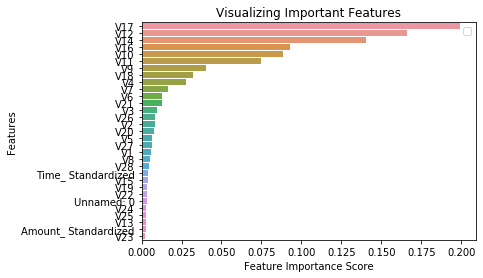

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()